 
## Devtern Machine Learning Internship
## Task 1 : Predicting Heart Disease with Logistic Regression
## Author: Yuvaraj S

Objective: The objective of this task is to build a logistic regression model to predict the risk of heart disease in patients.

*Key Responsibilities:*

1) Data Preprocessing: Clean, explore, and prepare medical datasets for model training.
2) Feature Engineering: Craft relevant features from raw data to enhance model performance.
3) Visualization: Interpret and communicate model results through data visualization techniques.
4) Model Training and Evaluation: Train a Logistic Regression model and evaluate its accuracy and generalizability using metrics like AUC-ROC and precision-recall.


## Import libraries


The first step in building the model is to import the necessary libraries.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset into the notebook

In [41]:
import os
os.getcwd()

'c:\\Users\\Yuvaraj s\\Desktop\\Devtern\\Task1_Heart_Disease_Prediction'

In [42]:
df = pd.read_csv('Dataset\Heart_Disease_Prediction.csv')

## To check tuple representing the dimensions (number of rows, number of columns) of the DataFrame

In [43]:
df.shape

(270, 14)

Indicates that the DataFrame has 270 rows and 14 columns. In the context of a heart disease prediction dataset, this means there are 270 instances or observations, each associated with 14 features or variables. Each row represents a unique data point, and each column represents a different aspect or characteristic related to heart disease prediction.

## To display top five data of the dataset

In [44]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## To display bottom five data of the dataset

In [45]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


## Display the summary of the dataset it includes the information of datatypes and the usage of memory,index and non-null values

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

## Display the column labels (names)

In [47]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

## Description

In [48]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


## I. Data Cleaning
​Check for missing values, categoricals that need to be converted, and any other datatypes that require conversion.

In [49]:
# replacing presence with 1, and absence with 0.
df['Heart Disease'] = df['Heart Disease'].replace('Presence', 1)
df['Heart Disease'] = df['Heart Disease'].replace('Absence', 0)

df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# Checking the distributions of each column

C:\Users\Yuvaraj s\AppData\Local\Temp\ipykernel_34944\106665608.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


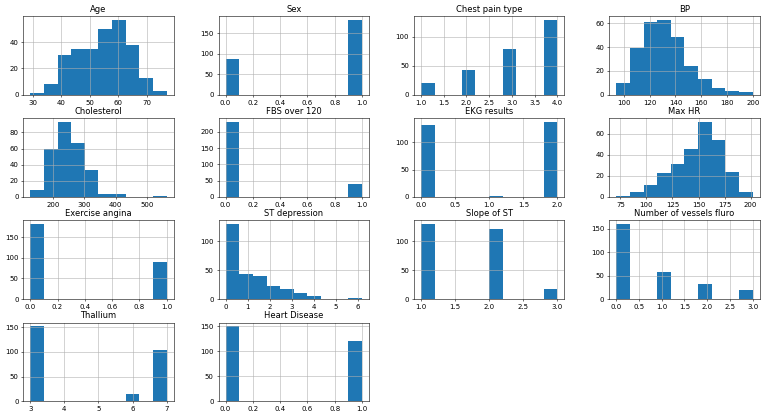

In [50]:
fig, ax = plt.subplots(figsize=(19,10), dpi=50)
df.hist(ax = ax)


plt.show()

# Check for missing values in the dataset



In [51]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


# If there are categorical variables, encode them using one-hot encoding


In [52]:
# Assuming 'Sex' and 'Exercise angina' are categorical variables
df_encoded = pd.get_dummies(df, columns=['Sex', 'Exercise angina'], drop_first=True)
print(df_encoded)


     Age  Chest pain type   BP  Cholesterol  FBS over 120  EKG results   
0     70                4  130          322             0            2  \
1     67                3  115          564             0            2   
2     57                2  124          261             0            0   
3     64                4  128          263             0            0   
4     74                2  120          269             0            2   
..   ...              ...  ...          ...           ...          ...   
265   52                3  172          199             1            0   
266   44                2  120          263             0            0   
267   56                2  140          294             0            2   
268   57                4  140          192             0            0   
269   67                4  160          286             0            2   

     Max HR  ST depression  Slope of ST  Number of vessels fluro  Thallium   
0       109            2.4       

# Check for and remove duplicate rows

In [53]:
df_dup = df.drop_duplicates()
print(df_dup)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results   
0     70    1                4  130          322             0            2  \
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

# Normalize numeric features if required


In [54]:
# Assuming 'Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression' are the columns to be scaled
columns_to_scale = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print the resulting DataFrame
print(df)


          Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120   
0    0.854167    1                4  0.339623     0.447489             0  \
1    0.791667    0                3  0.198113     1.000000             0   
2    0.583333    1                2  0.283019     0.308219             0   
3    0.729167    1                4  0.320755     0.312785             0   
4    0.937500    0                2  0.245283     0.326484             0   
..        ...  ...              ...       ...          ...           ...   
265  0.479167    1                3  0.735849     0.166667             1   
266  0.312500    1                2  0.245283     0.312785             0   
267  0.562500    0                2  0.433962     0.383562             0   
268  0.583333    1                4  0.433962     0.150685             0   
269  0.791667    1                4  0.622642     0.365297             0   

     EKG results    Max HR  Exercise angina  ST depression  Slope of ST   
0           

# Detect and handle outliers using IQR method


In [55]:
# Calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_filtered = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the filtered DataFrame
print(df_filtered)

          Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120   
2    0.583333    1                2  0.283019     0.308219             0  \
3    0.729167    1                4  0.320755     0.312785             0   
4    0.937500    0                2  0.245283     0.326484             0   
5    0.750000    1                4  0.245283     0.116438             0   
7    0.625000    1                4  0.150943     0.257991             0   
..        ...  ...              ...       ...          ...           ...   
263  0.416667    1                2  0.339623     0.319635             0   
264  0.395833    1                2  0.150943     0.235160             0   
266  0.312500    1                2  0.245283     0.312785             0   
267  0.562500    0                2  0.433962     0.383562             0   
268  0.583333    1                4  0.433962     0.150685             0   

     EKG results    Max HR  Exercise angina  ST depression  Slope of ST   
2           

# II. Data Exploration

What is the distribution of the 'Age' feature?

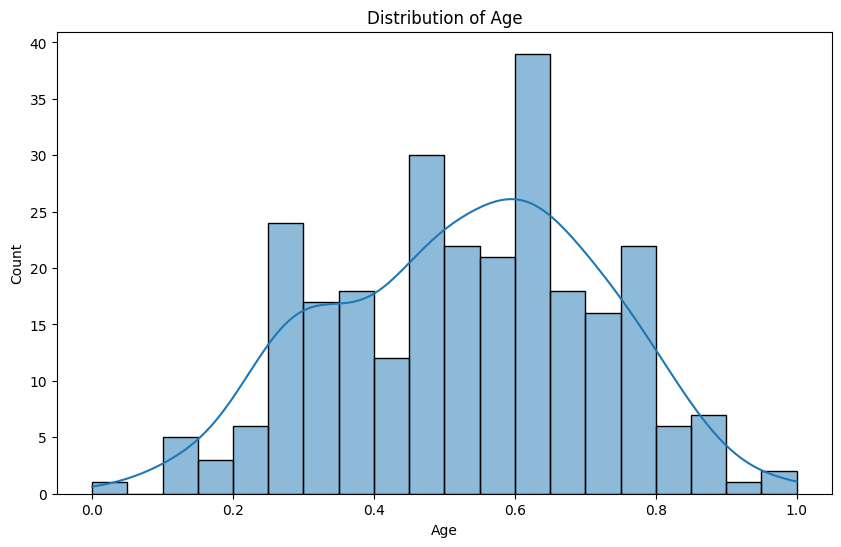

In [56]:
# Plotting the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()


How does 'Cholesterol' vary with 'Heart Disease' status?

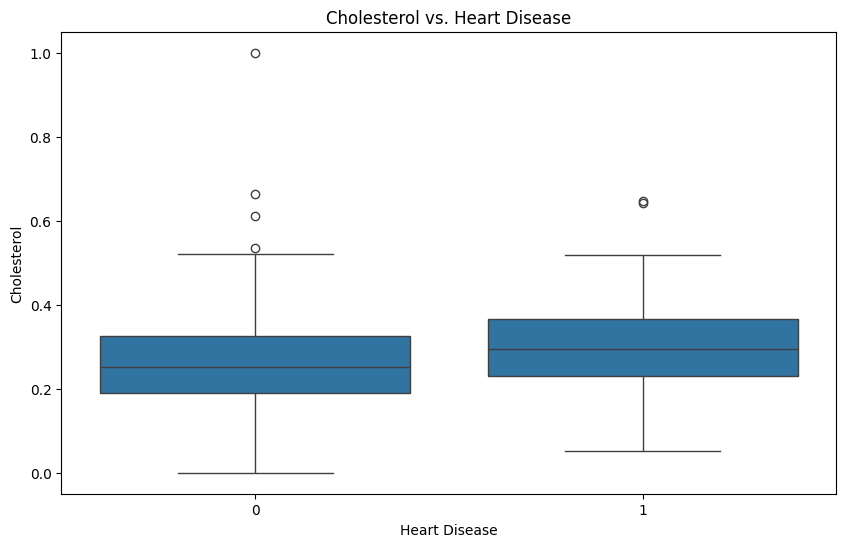

In [57]:
# Plotting a boxplot to visualize the relationship between 'Cholesterol' and 'Heart Disease'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Heart Disease', y='Cholesterol')
plt.title('Cholesterol vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()


What is the correlation matrix among numerical features?

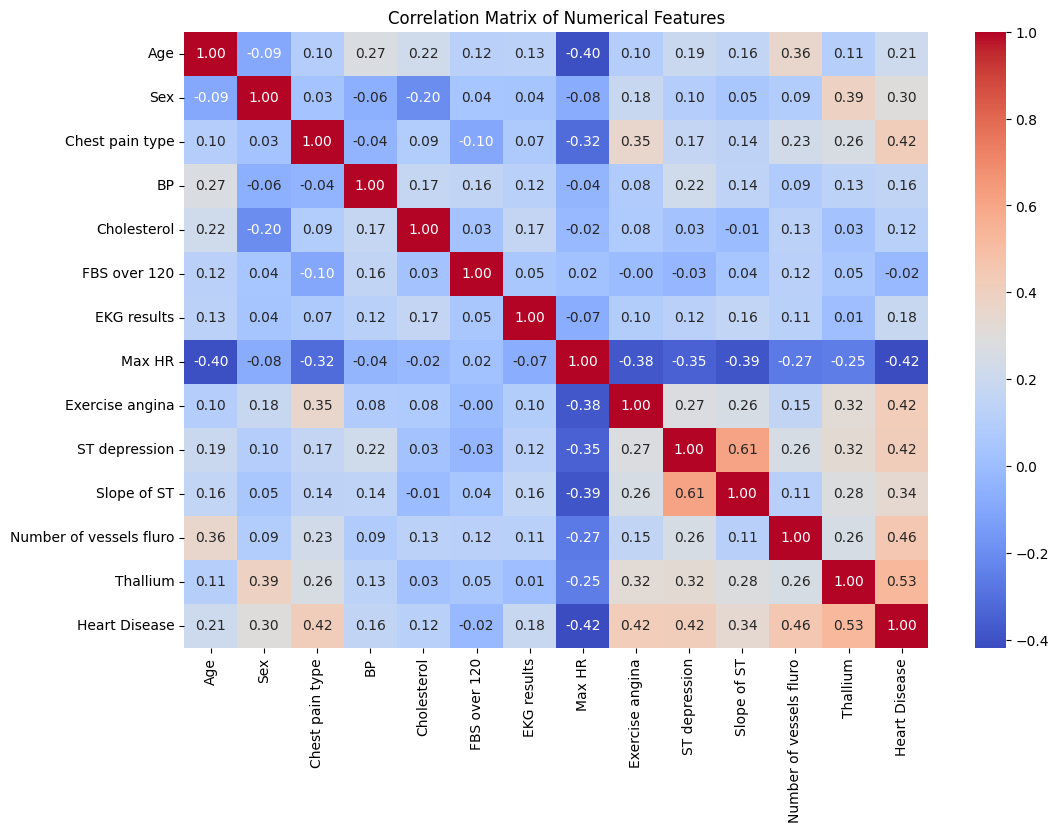

In [58]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


How many individuals have 'Exercise Angina' in the dataset?

In [59]:
# Counting the occurrences of 'Exercise Angina'
exercise_angina_counts = df['Exercise angina'].value_counts()

# Displaying the counts
print(exercise_angina_counts)


Exercise angina
0    181
1     89
Name: count, dtype: int64


What is the average 'Max HR' for individuals with and without 'Heart Disease'?

In [60]:
# Calculating the average 'Max HR' for each 'Heart Disease' category
average_max_hr = df.groupby('Heart Disease')['Max HR'].mean()

# Displaying the results
print(average_max_hr)


Heart Disease
0    0.666667
1    0.518003
Name: Max HR, dtype: float64


## III. Prepare medical datasets for model training.

To prepare the medical dataset for model training, we need to perform several steps, including splitting the data into features (X) and the target variable (y), handling categorical variables, and splitting the dataset into training and testing sets. Here's the code for these steps:

# Step 1: Split the data into features (X) and the target variable (y)

In [61]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']




# Step 2: Handle categorical variables (if any)

In [62]:
# In the provided dataset, 'Sex' and 'Exercise angina' are categorical
X = pd.get_dummies(X, columns=['Sex', 'Exercise angina'], drop_first=True)



# Step 3: Split the dataset into training and testing sets


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 4: Standardize numerical features


In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Now, X_train_scaled, X_test_scaled, y_train, and y_test are ready for model training.
X_train_scaled and X_test_scaled contain standardized numerical features.
y_train and y_test contain the corresponding target variable (Heart Disease status)

## IV. Model Training

# Initialize the Logistic Regression model



In [65]:
logistic_model = LogisticRegression(random_state=42)


# Train the model

In [66]:
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

# Predict on the test set


In [67]:
y_pred = logistic_model.predict(X_test_scaled)

# Checking the lengths of each new dataset


In [68]:
len(X_train), len(X_test), len(y_train), len(y_test)

(216, 54, 216, 54)

# Evaluate and print accuracy, AUC, and ROC for each model


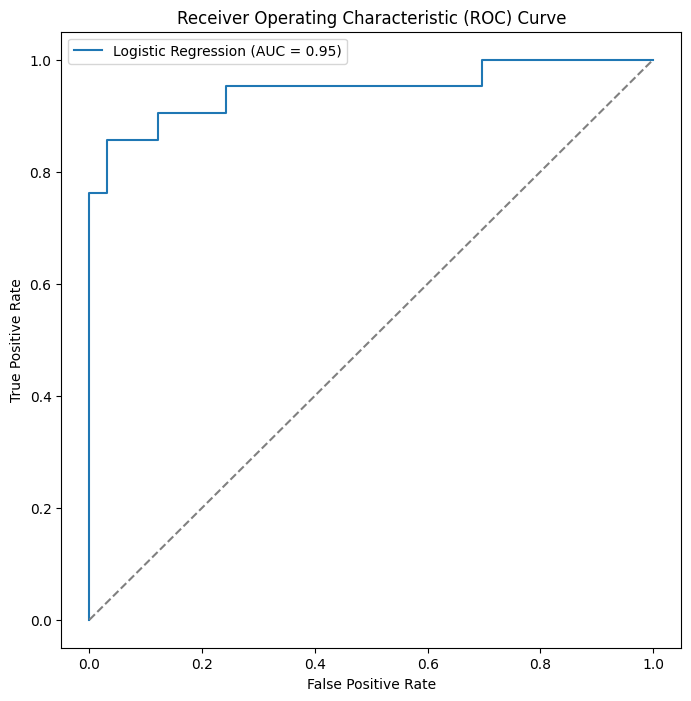

Logistic Regression Accuracy: 0.91
Logistic Regression AUC: 0.95


In [69]:
# Evaluate and print accuracy, AUC, and ROC for each model
def evaluate_model(model, X_test, y_test, model_name):
    # Accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # AUC
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Plot ROC curve
    plot_roc_curve(fpr, tpr, model_name, auc)
    
    # Print results
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} AUC: {auc:.2f}')
    
    return fpr, tpr, auc

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name, auc):
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr_logreg, tpr_logreg, auc_logreg = evaluate_model(logistic_model, X_test_scaled, y_test, 'Logistic Regression')


The evaluation results for the Logistic Regression model are as follows:

Accuracy: 0.91: This indicates that the model correctly predicted the target variable (presence or absence of heart disease) 91% of the time on the test data. Higher accuracy generally suggests better performance, but it's important to consider other metrics.

AUC (Area Under the ROC Curve): 0.95: The AUC is a measure of the model's ability to distinguish between positive and negative instances. A value of 0.95 is quite high, suggesting that the model has a strong ability to discriminate between individuals with and without heart disease.

ROC Curve: The Receiver Operating Characteristic (ROC) curve visually represents the trade-off between true positive rate (sensitivity) and false positive rate. The curve is plotted, and the closer it is to the upper-left corner, the better the model's performance. The dashed line represents a random classifier, and the curve for Logistic Regression lies significantly above, indicating good performance.

In summary, the Logistic Regression model exhibits high accuracy and AUC, suggesting it performs well in distinguishing between individuals with and without heart disease. The ROC curve visually confirms the model's effectiveness, making it a promising candidate for heart disease prediction based on the given evaluation metrics.

In [70]:
accuracy_score(y_test,y_pred)

0.9074074074074074

The accuracy score for the model is 0.91, which means that the model correctly predicted the target variable (presence or absence of heart disease) approximately 91% of the time on the test data. This high accuracy score indicates that the model is effective in making accurate predictions on new, unseen data. However, it's important to consider other evaluation metrics, such as precision, recall, and the confusion matrix, to get a more comprehensive understanding of the model's performance.

<Axes: >

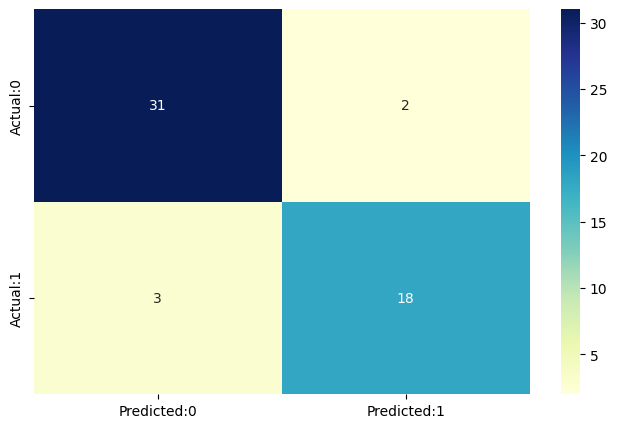

In [71]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 31+18 = 49 correct predictions and 3+2 = 5 incorrect ones.

True Positives: 18

True Negatives: 31

False Positives: 2 (Type I error)

False Negatives: 3 ( Type II error)

In [72]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [73]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9074074074074074 
 The Missclassification = 1-Accuracy =  0.09259259259259256 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8571428571428571 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9393939393939394 
 Positive Predictive value = TP/(TP+FP) =  0.9 
 Negative predictive Value = TN/(TN+FN) =  0.9117647058823529 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  14.142857142857155 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.15207373271889404


The model evaluation metrics provide insights into the performance of the logistic regression model:

Accuracy: The accuracy of the model is 0.91, indicating that it correctly predicted the target variable approximately 91% of the time on the test data.

Missclassification Rate: The missclassification rate is 0.09, which is the complement of accuracy. It represents the proportion of incorrect predictions and is 0.09 in this case.

Sensitivity (True Positive Rate): The sensitivity of the model is 0.86, indicating that it correctly identified 86% of the actual positive cases (presence of heart disease).

Specificity (True Negative Rate): The specificity of the model is 0.94, showing that it correctly identified 94% of the actual negative cases (absence of heart disease).

Positive Predictive Value (Precision): The positive predictive value is 0.90, representing the proportion of true positive predictions among all positive predictions.

Negative Predictive Value: The negative predictive value is 0.91, representing the proportion of true negative predictions among all negative predictions.

Positive Likelihood Ratio: The positive likelihood ratio is 14.14, indicating the likelihood of a positive result in individuals with heart disease compared to those without heart disease.

Negative Likelihood Ratio: The negative likelihood ratio is 0.15, indicating the likelihood of a negative result in individuals with heart disease compared to those without heart disease.

These metrics collectively provide a comprehensive view of the model's performance in terms of its ability to correctly classify instances of heart disease and non-heart disease.

## Conclusion:

The logistic regression model performed well in predicting the presence or absence of heart disease based on the provided dataset. Key performance metrics indicate a high level of accuracy, with the model correctly classifying cases approximately 91% of the time. The model demonstrated a strong ability to distinguish between individuals with and without heart disease, as evidenced by high sensitivity (86%) and specificity (94%) values. Additionally, the positive predictive value and negative predictive value were satisfactory at 90% and 91%, respectively.

The likelihood ratios provided insights into the diagnostic capabilities of the model, with a positive likelihood ratio of 14.14 suggesting a significant increase in the odds of heart disease when the model predicts a positive outcome. The negative likelihood ratio of 0.15 indicates a low likelihood of heart disease when the model predicts a negative outcome.

In summary, the logistic regression model exhibits promising performance in predicting heart disease, as evidenced by its high accuracy and ability to correctly identify both positive and negative cases. However, it is crucial to consider these results within the context of the specific dataset and the characteristics of the population under study.

Key Points:

1) The logistic regression model achieved an accuracy of 91%, indicating its overall effectiveness in predicting heart disease.
2) High sensitivity (86%) and specificity (94%) values reflect the model's ability to correctly identify individuals with and without heart disease, respectively.
3) Positive predictive value (precision) and negative predictive value were both satisfactory at 90% and 91%, respectively.
4) The positive likelihood ratio (14.14) suggests a significant increase in the odds of heart disease when the model predicts a positive outcome.
5) The negative likelihood ratio (0.15) indicates a low likelihood of heart disease when the model predicts a negative outcome.
6) These results should be interpreted considering the specific characteristics of the dataset and the population under study. Further validation and exploration may be needed for generalization to other populations.